# Moudle2 Summary

## I.Introduction and Background information:

Yelp is an American Internet corporation. It mainly hosts Yelp.com and the Yelp mobile app, which publish crowd-sourced reviews about local businesses. To help people find great local businesses, Yelp has provided a platform where all users are able to write reviews of each business.

This dataset contains several different dimensions. We are trying to use this dataset to perform a sentiment analysis for each review. 

Basically, we have two main goals:
1.	Find out what makes a review positive or negative.
2.	Predict a review’s rating based on given features(mainly the text). 


## II.Thesis statement:

From our analysis, whether a review is positive or negative depends on review date, category of the restaurant, whether a restaurant is chain or local, type of food, quality of service, price, and atmosphere.

We tried several models, such as multinomial naive bayes, lasso, and svr to make predictions of rating stars, and it turned out that nerual network had the lowest root mean squared error after dimension reduction using word2vec.

## III.Data Process:

First, take a short look at dataset:
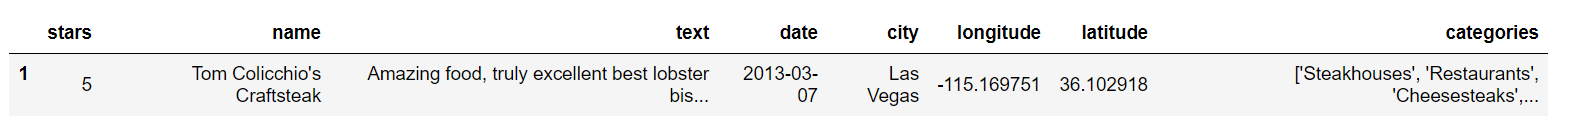

Then, look into each feature detailly. 
### 1.      Name
For restaurants’ names, we first notice that there are some chain restaurants’ labels such as McDonald’s, Dairy Queen. This fact reminds us that rating for chain restaurants and local restaurants may be different. To find out if this true or not, we trying to do the U-test and the p-value is nearly to 0.

Thus, we have strong evidence to say that this ‘chain and local’ label has some effects on star rating. We may consider it as a feature in our models.
### 2.      Time:
From plot of star mean per month, we could know that with the increase of number of reviews, star mean goes to be stable and after time series analysis, we could not find any seasonal trend or other special trend.
Since the first part with high star mean only contains about 5% of the whole data points, and the difference between this part and the rest of our data points is not too much large, we just ignore this issue and drop Time feature in our dataset.
### 3.      City and Location(latitude and longitude):
Since city names and locations provide almost same information, we consider them together. First, look at the data distribution. We make a points plot with latitude as y-axis and longitude as x-axis. There are three clusters on the map: around Las Vegas, around Toronto and London(Notice that there are some points located in Asia which are really mistakes). The distriubtion reminds us that we can use K-means to cluster location. The cluster labels may provide us with some useful infomation for modeling.
 
### 4.      Categories:
After using strsplit function in R and more cleaning process, we got 605 unique category names. Some of them show skewness, while others show approximately uniform distribution among 1-5 stars.
 
We generate a sparse matrix with 1.5 million rows and 605 coloums, and may consider this feature in our final model.

### 5.      Text:
We first explored review texts, and found that there are 34 unique languages. Since 99% of them are English, we just ignore other languages.

We did the following steps to preprocess review text.

(1) We created a special marks feature baesd on texts to see whether a review contains symbols like '!!', '?!', '!?', ':)', ':-)', ':(', ':-('. Because these special symbols give strong sentiment information, they will be useful in modeling. 

(2) Then, all texts are lower-cased, and punctuations are removed for simplicity. 

(3) After above steps, we split texts and counted frequency of each word. Words that appear less than 20 times are removed. In this step, other languages are removed. We also selected words of high frequency but are meaningless manually, and removed them.

(4) For different models, we used different methods to deal with text data:
1. For multinomial naive bayes, lasso, and svr, we created count sparse matrix and TF-IDF sparse matrix;
2. For neural network, we first used word2vec to convert each word to a vector of numbers, and then calculated mean and standard deviation for each position for each review.

## IV.Modeling and Model selection:

### **1. Rating Modeling**
#### (1) Linear Model:
Since we have convert all text reviews into numerical values, try linear model as our first model is quite reasonable. Mainly, we use the Lasso method. 

Features we used are: 
1. the word vector with 200 values
2. the text length for each review
3. the 'Chain or Local' label
4. the 'special mark' label

#### (2) Naive Bayes:
Since we have a quite large dataset, we consider using Multinomial Naive Bayes to do modeling. Naive Bayes is a simple probabilistic classifiers. It uses very simple assumptions and often feedback quite good results.

Features we used are:
1. the word vector with 200 values
2. the text length for each review
3. the 'Chain or Local' label
4. the 'special mark' label

#### (3) Support Vector Machine:
This problem is a multiclass classification problem. Thus, we consider use the SVM to do the modeling. SVM is a supervised learning model for both classification and regression problem. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.

Features we used here are:
1. the word vector with 200 values
2. the text length for each review
3. the 'Chain or Local' label
4. the 'special mark' label
Besides, since SVM is proper for classification problem, we first try to model as a multiclass problem. After that, we try it in SVR way. 

#### (4)  Nerual Network:
At last, we try to use the NNT since this is a common and effective model in natural language processing. We mainly consider three types of NNT.
1. BP-NNT:Backpropagation is the basic method used in neural networks to calculate a gradient which is needed in the calculation of the weights to be used in the network.In the context of learning, backpropagation is commonly used by the gradient descent optimization algorithm to adjust the weight of neurons by calculating of the loss function. It is stright-forward algorithm.
2. CNN: Convolutional neural network is a class of deep, feed-forward artificial neural networks(and quite popular in analyzing visual imagery). This algorithm make simpler assumptions and have stronger effects compared with BP-NNT
3. LSTM: Long short-term memory (LSTM) blocks are a building unit for layers of a recurrent neural network (RNN). This algorithm solved the porblem for RNN that it do not has long term memory. It performs much better.

Features we used are:
1. the word vector with 200 values
2. the std vector with 200 values
2. the text length for each review

### 2. Toptics Modeling:
To find what makes a review positive or negative, we try to conduct Topic modeling here. Latent Dirichlet allocation is a generative statistical model that can extract some common topics from dataset. Followings are the setps of our LDA modeling:
1. we group 1 and 2 stars' reviews as the Negative reviews, 4 and 5 stars' reviews as Positive reviews.
2. For each group, we try LDA with different parameters
After serval rounds of LDA modeling, we can conclude some significant topics who share 

### **3. Model selection and diagnositcs **

**Support vector machine**: The model put inputs into an even higher dimension space and use kernel to find best split of dataset to make predictions. Since we have a very high dimensional data, this algorithm has a very intensive computing issue. It takes a long time to implementation with all the data and accuracy is not satisfied.

**Linear model with Lasso**: It seems that if we use the word embedding vector(200 dimension) as input, we do not need lasso to control feature number and overfitting issue, which in turn tells us that Lasso performances bad here.

**Multinomial Naive bayes**: Probability model seems reasonable here. We use both count vectorization and TF-IDF method to convert text into a sparse matrix which then are used as input for the model. The model gives us a relatively low mean square error compared with linear model and svr. 

**Neural Network**: This is deep learning model which has relatively computing power and relatively high predictive accuracy. 

## V.Summary:

1. After trying several reasonable models, we found out that neural network with 200-dimension Word2Vec as the input layer performs best
2. Due to limitation of compute performance, we could not add categories sparse matrix into our final model
3. After trying mean, median, minimum, and maximum of each entry of vectorlized review text as the input layer, we found that mean performs best

### Final results:
**I** Our final model is NNT mdoel, the performance are:

| Mse on validation set | Accuracy on validation set | Rmes on Kaggle |
| --------------------- | -------------------------- | -------------- |
| 0.450                 | 0.60                       | 0.671          |

**II** To answer the question what makes a review positive or negative, after conisderation, we decide to use our predictions. The main reason is that the result comes from LDA takes too much objective choices which can be quite confusing sometimes. Using our model, if the predicted star is 1 or 2, we consider the review as negative. If the predicted star is 3,4 or 5, we consider the review as positive.

## Contributions:

**Wenyan Zhou**: *Data processing, clean text, topic modeling and github repo.*
**Bolaing Ma**: *Clean train text data, word to vector model.*
**Yan Chu**: *Category manipulation, data visulization,power point making.
**Ruidong Lan**: *Coding, modeling and summary for each model.*
## Reference:
[1]DATAQUEST. 2015. *Natural Language Processing with Python Tutorial.* [ONLINE] Available at: https://www.dataquest.io/blog/natural-language-processing-with-python/. [Accessed 1 May 2015].

[2]Wikipedia. 2018. *Hierarchical clustering.* [ONLINE] Available at: https://en.wikipedia.org/wiki/Hierarchical_clustering. [Accessed 26 February 2018].

[3]David Robinson. 2016. *Does sentiment analysis work? A tidy analysis of Yelp reviews.* [ONLINE] Available at: http://varianceexplained.org/r/yelp-sentiment/. [Accessed 21 July 2016].

[4]RPubs. 2016. *LDA Topic Models.* [ONLINE] Available at: https://rpubs.com/Zyrix/yelptask1. [Accessed 27 July 2016].
